In [5]:
import torch
from diffusers import StableDiffusionPipeline
from huggingface_hub import notebook_login
notebook_login()

In [8]:
import datetime
import errno
import json
import os
import sys
import tempfile
from argparse import ArgumentParser
import time
from PIL import Image
import pickle
import torch
from diffusers import StableDiffusionPipeline
from huggingface_hub import notebook_login
from datetime import datetime

from flask import Flask, request, abort, send_from_directory
from werkzeug.middleware.proxy_fix import ProxyFix

In [ ]:
device = 'cuda'

generator = torch.Generator(device).manual_seed(1024)

In [ ]:
model_id = "runwayml/stable-diffusion-v1-5"
model = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16, revision="fp16", use_auth_token=True)
model = model.to(device)  ### Load pretrained Model

In [ ]:
from datetime import datetime   ## เอา String วันที่,เวลา  มา   ไว้ใช้ตั้งชื่อไฟล์ไม่ให้ซ้ำ
def getDate():
    now = datetime.now()
    str_time = now.strftime("%dl%ml%y_%Hl%Ml%S")
    return str_time


In [ ]:
import os

def generateIMG(prompt,model):  ## ฟังก์ชั่น Genetate ภาพ โยน str prompt , Model
    
    str_time=getDate();
    
    
    image = model(prompt,width=512, height=512,num_inference_steps=150).images[0]  

    path = r'./output'
    if(not os.path.isdir(path)):
        os.mkdir("output")

    filename = prompt.replace(" ", "_")
    filename = str_time+"-"+filename
    image.save(path+r"/"+filename+".png")
    
    return(image)


In [ ]:
generateIMG("snow",model)  ## เรียกฟังก์ชั่น Genetate ภาพ

In [2]:
with open("./ModelSave/LatestmodelSaved.pickle", "wb") as file: ## Save Model เป็น Latest
    pickle.dump(model, file)

NameError: name 'pickle' is not defined

In [3]:
with open("./ModelSave/LatestmodelSaved.pickle", "rb") as file:  ## Load Pipeline Model
    loaded_model = pickle.load(file)

NameError: name 'pickle' is not defined

In [4]:
generateIMG("snow",loaded_model)  ## เรียกฟังก์ชั่น Genetate ภาพ

NameError: name 'generateIMG' is not defined

In [5]:
import pickle   ## Save Pipeline Model   (Note. StableDiffusionPipeline เป็นชื่อ Model ที่เราโหลดมาใช้อยู่)

with open("./ModelSave/LatestmodelSaved.pickle", "wb") as file: ## Save Model เป็น Latest
    pickle.dump(model, file)
    
str_time=getDate();
with open("./ModelSave/modelSaved_"+str_time+".pickle", "wb") as file:  ## Save Model เป็น Time (BackUp)
    pickle.dump(model, file)

NameError: name 'model' is not defined

In [3]:
import pickle 

with open("./ModelSave/LatestmodelSaved.pickle", "rb") as file:  ## Load Pipeline Model
    loaded_model = pickle.load(file)

100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:25<00:00,  5.91it/s]


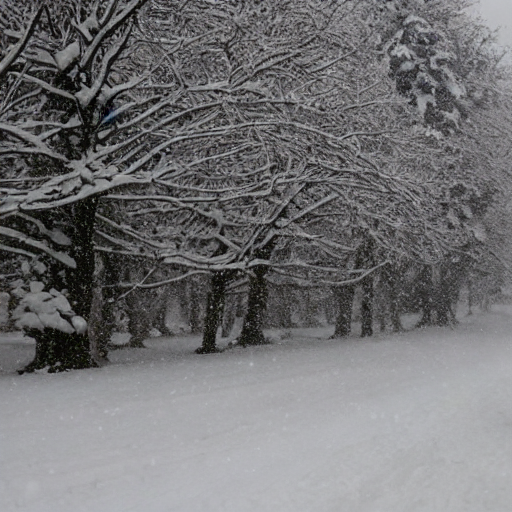

In [7]:
generateIMG("snow",loaded_model)  ## เรียกฟังก์ชั่น Genetate ภาพ